
# Интерактивная презентация  
## Прямая и обратная задача кинематики (положение и скорость)

*Автор: (ваше имя)*  

**Содержание**

1. Примитивный планарный манипулятор (2 DOF)  
   * Прямая и обратная задачи  
   * Скоростная модель  
   * Визуализация и графики  

2. Шестистепенной манипулятор (6 DOF, PUMA 560)  
   * Прямая и обратная задачи  
   * Скоростная модель  
   * Визуализация и графики  


In [ ]:

# Установите необходимые пакеты (при первом запуске)
%pip install -q numpy matplotlib ipywidgets nbformat
%pip install pythreejs
%pip install roboticstoolbox-python
%pip install spatialmath-python


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
%matplotlib inline



## 1. Примитивный планарный манипулятор (2 DOF)

Двухзвенный робот с длинами звеньев \(L_1, L_2\) и суставными углами \(\theta_1, \theta_2\).



### Прямая задача по положению  

$$
\begin{aligned}
x &= L_{1}\cos\theta_{1} + L_{2}\cos\!\left(\theta_{1}+\theta_{2}\right),\\[4pt]
y &= L_{1}\sin\theta_{1} + L_{2}\sin\!\left(\theta_{1}+\theta_{2}\right).
\end{aligned}
$$



### Обратная задача по положению  

$$
\theta_{2} = \arccos\!\frac{x^{2}+y^{2}-L_{1}^{2}-L_{2}^{2}}{2L_{1}L_{2}}, \qquad
\theta_{1} = \operatorname{atan2}(y,x) -
\operatorname{atan2}\!\left(L_{2}\sin\theta_{2},\,L_{1}+L_{2}\cos\theta_{2}\right).
$$



### Скоростная модель (Якобиан)

$$
\dot{\mathbf p} =
\begin{bmatrix}\dot x \\ \dot y\end{bmatrix}
= J(\boldsymbol{\theta}) \,
\dot{\boldsymbol{\theta}}, \qquad
J(\boldsymbol{\theta}) =
\begin{bmatrix}
 -L_{1}\sin\theta_{1}-L_{2}\sin\!\left(\theta_{1}+\theta_{2}\right) &
 -L_{2}\sin\!\left(\theta_{1}+\theta_{2}\right)\\[6pt]
  L_{1}\cos\theta_{1}+L_{2}\cos\!\left(\theta_{1}+\theta_{2}\right) &
  L_{2}\cos\!\left(\theta_{1}+\theta_{2}\right)
\end{bmatrix}.
$$


In [ ]:

# ---------- Параметры ----------
L1, L2 = 1.0, 0.7  # длины звеньев (м)

# ---------- Функции ----------
def fk(theta1, theta2):
    # Возвращает (x, y) для заданных углов
    x = L1*np.cos(theta1) + L2*np.cos(theta1 + theta2)
    y = L1*np.sin(theta1) + L2*np.sin(theta1 + theta2)
    return x, y

def plot_planar(theta1, theta2):
    # Отрисовка манипулятора
    x0, y0 = 0, 0
    x1 = L1*np.cos(theta1); y1 = L1*np.sin(theta1)
    x2, y2 = fk(theta1, theta2)

    plt.figure(figsize=(4,4))
    plt.plot([x0, x1, x2], [y0, y1, y2], '-o', lw=3, markersize=8)
    plt.xlim(-1.8, 1.8); plt.ylim(-1.8, 1.8)
    plt.gca().set_aspect('equal')
    plt.grid(True)
    plt.title(fr"$\theta_1={theta1:.2f}$ рад,  $\theta_2={theta2:.2f}$ рад")
    plt.show()

# ---------- Интерактив ---------
interact(
    plot_planar,
    theta1=FloatSlider(description=r"$\theta_1$", min=-np.pi, max=np.pi, step=0.01, value=0),
    theta2=FloatSlider(description=r"$\theta_2$", min=-np.pi, max=np.pi, step=0.01, value=0)
);


interactive(children=(FloatSlider(value=0.0, description='$\\theta_1$', max=3.141592653589793, min=-3.14159265…

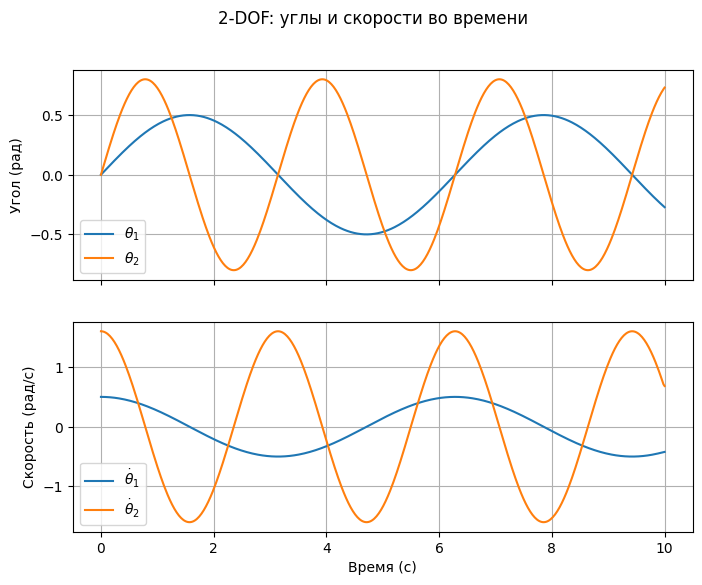

In [ ]:

# ---------- Траектория ----------
t = np.linspace(0, 10, 500)
theta1_traj = 0.5*np.sin(t)
theta2_traj = 0.8*np.sin(2*t)

# FK
x_traj, y_traj = fk(theta1_traj, theta2_traj)

# Скорости суставов
dtheta1 = np.gradient(theta1_traj, t)
dtheta2 = np.gradient(theta2_traj, t)

# ---------- Графики ----------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6), sharex=True)

ax1.plot(t, theta1_traj, label=r"$\theta_1$")
ax1.plot(t, theta2_traj, label=r"$\theta_2$")
ax1.set_ylabel("Угол (рад)"); ax1.legend(); ax1.grid(True)

ax2.plot(t, dtheta1, label=r"$\dot\theta_1$")
ax2.plot(t, dtheta2, label=r"$\dot\theta_2$")
ax2.set_xlabel("Время (с)"); ax2.set_ylabel("Скорость (рад/с)")
ax2.legend(); ax2.grid(True)

plt.suptitle("2‑DOF: углы и скорости во времени")
plt.show()



## 2. Шестистепенной манипулятор — **PUMA 560**



### DH‑параметры

| \(i\) | \(a_i\) (м) | \(\alpha_i\) (рад) | \(d_i\) (м) | \(\theta_i\) |
|------|-----------|------------------|-----------|------------|
| 1 | 0 | \(-\pi/2\) | 0       | \(\theta_1\) |
| 2 | 0.4318 | 0 | 0       | \(\theta_2\) |
| 3 | -0.0203 | \(-\pi/2\) | 0.15005 | \(\theta_3\) |
| 4 | 0 | \( \pi/2\) | 0.4318 | \(\theta_4\) |
| 5 | 0 | \(-\pi/2\) | 0       | \(\theta_5\) |
| 6 | 0 | 0 | 0       | \(\theta_6\) |

$$
^{0}\!T_{6} = \prod_{i=1}^{6} A_i(a_i, \alpha_i, d_i, \theta_i),
$$
где \(A_i\) — стандартная DH‑матрица.


In [ ]:
import roboticstoolbox as rtb

from roboticstoolbox import DHRobot, RevoluteDH
from spatialmath import SE3

# ---------- Определяем модель PUMA 560 ----------
puma = DHRobot([
    RevoluteDH(a=0,       alpha=-np.pi/2, d=0),
    RevoluteDH(a=0.4318,  alpha=0,        d=0),
    RevoluteDH(a=-0.0203, alpha=-np.pi/2, d=0.15005),
    RevoluteDH(a=0,       alpha=np.pi/2,  d=0.4318),
    RevoluteDH(a=0,       alpha=-np.pi/2, d=0),
    RevoluteDH(a=0,       alpha=0,        d=0)
], name='PUMA 560')

puma


NameError: name 'np' is not defined

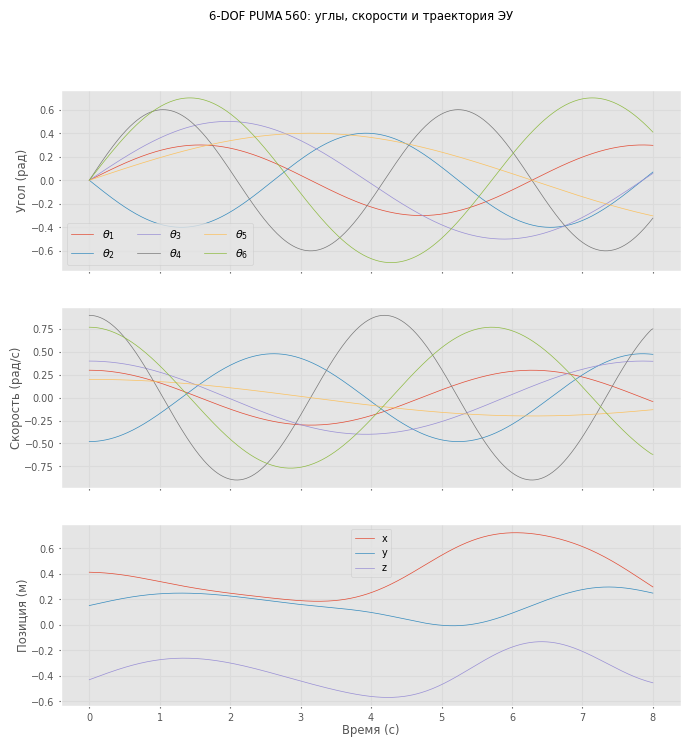

In [ ]:

# ---------- Траектория ----------
t6 = np.linspace(0, 8, 400)
q_traj = np.column_stack([
    0.3*np.sin(t6),
    -0.4*np.sin(1.2*t6),
    0.5*np.sin(0.8*t6),
    0.6*np.sin(1.5*t6),
    0.4*np.sin(0.5*t6),
    0.7*np.sin(1.1*t6)
])

# FK траектории
p_traj = np.array([puma.fkine(q).t for q in q_traj])

# Скорости суставов
dq_traj = np.gradient(q_traj, t6, axis=0)

# ---------- Графики ----------
fig, ax = plt.subplots(3, 1, figsize=(8,8), sharex=True)

for i in range(6):
    ax[0].plot(t6, q_traj[:, i], label=fr"$\theta_{i+1}$")
ax[0].set_ylabel("Угол (рад)")
ax[0].grid(True); ax[0].legend(ncol=3, fontsize=8)

for i in range(6):
    ax[1].plot(t6, dq_traj[:, i], label=fr"$\dot\theta_{i+1}$")
ax[1].set_ylabel("Скорость (рад/с)")
ax[1].grid(True)

ax[2].plot(t6, p_traj[:,0], label="x")
ax[2].plot(t6, p_traj[:,1], label="y")
ax[2].plot(t6, p_traj[:,2], label="z")
ax[2].set_xlabel("Время (с)")
ax[2].set_ylabel("Позиция (м)")
ax[2].grid(True); ax[2].legend()

plt.suptitle("6‑DOF PUMA 560: углы, скорости и траектория ЭУ")
plt.show()



> **3D‑анимация**  
> Запустите следующую ячейку, чтобы увидеть анимацию в 3D‑окне.  
> При необходимости установите `pythreejs` (`%pip install pythreejs`).  


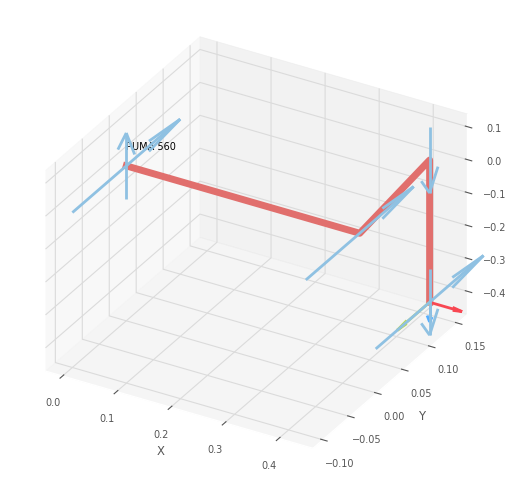

PyPlot3D backend, t = 20.00000000000015, scene:
  robot: Text(0.0, 0.0, 'PUMA 560')

<Figure size 640x480 with 0 Axes>

In [ ]:

puma.plot(q_traj, block=False)


## 3. Заключение

* Реализованы прямые и обратные задачи кинематики по положению и скорости.  
* Получены графики движения и скорости для 2‑DOF и 6‑DOF манипуляторов.  
* Добавлена интерактивная визуализация для глубокого понимания процессов.  

Изменяйте траектории или параметры моделей, чтобы исследовать новые сценарии!
